In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
csvFileNames = ["Dataset/"+fname for fname in os.listdir("Dataset/")]
csvFileNames[:10]

['Dataset/1inch-usd.csv',
 'Dataset/1inch-ust.csv',
 'Dataset/aaabbb.csv',
 'Dataset/aave-usd.csv',
 'Dataset/aave-ust.csv',
 'Dataset/adabtc.csv',
 'Dataset/adaf0-ustf0.csv',
 'Dataset/adausd.csv',
 'Dataset/adaust.csv',
 'Dataset/aixusd.csv']

In [4]:
df = pd.read_csv(csvFileNames[1])
df.head()

,time,open,close,high,low,volume,Unnamed: 0
0,1628623080000,2.7569,2.7569,2.7569,2.7569,0.018769,NaN
1,1628623620000,2.7615,2.7629,2.7629,2.7615,25.443728,NaN
2,1628623680000,2.7702,2.7702,2.7702,2.7702,0.004324,NaN
3,1628623740000,2.7745,2.7745,2.7745,2.7745,0.034012,NaN
4,1628623980000,2.7636,2.7636,2.7636,2.7636,11.030000,NaN


In [5]:
datetime.datetime.utcfromtimestamp(1628623620).strftime('%Y-%m-%d %H:%M:%S')

'2021-08-10 19:27:00'

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
normalTime = []
for t in df['time']:
    normalTime.append(datetime.datetime.utcfromtimestamp(t/1000).strftime('%Y-%m-%d %H:%M:%S')) 

normalTime[:5]

['2021-08-10 19:18:00',
 '2021-08-10 19:27:00',
 '2021-08-10 19:28:00',
 '2021-08-10 19:29:00',
 '2021-08-10 19:33:00']

In [8]:
df['Normal Time'] = normalTime

In [9]:
df.head()

,time,open,close,high,low,volume,Normal Time
0,1628623080000,2.7569,2.7569,2.7569,2.7569,0.018769,2021-08-10 19:18:00
1,1628623620000,2.7615,2.7629,2.7629,2.7615,25.443728,2021-08-10 19:27:00
2,1628623680000,2.7702,2.7702,2.7702,2.7702,0.004324,2021-08-10 19:28:00
3,1628623740000,2.7745,2.7745,2.7745,2.7745,0.034012,2021-08-10 19:29:00
4,1628623980000,2.7636,2.7636,2.7636,2.7636,11.030000,2021-08-10 19:33:00


(array([ 57., 114., 113., 190., 273., 436., 520., 542., 537., 516., 522.,
        511., 383., 388., 331., 528., 420., 193.,  79.,  29.]),
 array([2.7071 , 2.75208, 2.79706, 2.84204, 2.88702, 2.932  , 2.97698,
        3.02196, 3.06694, 3.11192, 3.1569 , 3.20188, 3.24686, 3.29184,
        3.33682, 3.3818 , 3.42678, 3.47176, 3.51674, 3.56172, 3.6067 ]),
 <BarContainer object of 20 artists>)

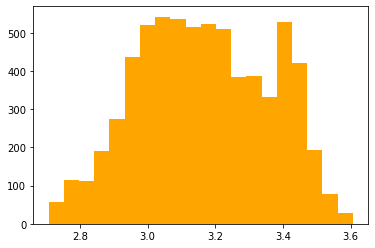

In [10]:
plt.hist(df['high'], bins=20, color="orange")

(array([ 55., 110., 114., 184., 277., 437., 525., 540., 539., 509., 529.,
        512., 378., 398., 328., 523., 425., 191.,  84.,  24.]),
 array([2.7048  , 2.749875, 2.79495 , 2.840025, 2.8851  , 2.930175,
        2.97525 , 3.020325, 3.0654  , 3.110475, 3.15555 , 3.200625,
        3.2457  , 3.290775, 3.33585 , 3.380925, 3.426   , 3.471075,
        3.51615 , 3.561225, 3.6063  ]),
 <BarContainer object of 20 artists>)

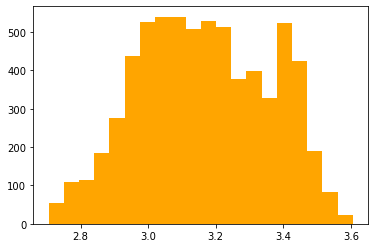

In [11]:
plt.hist(df['low'], bins=20, color="orange")

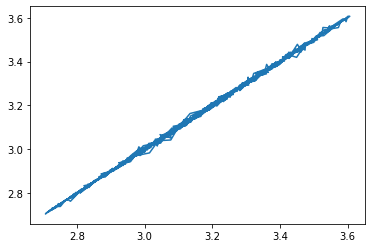

In [12]:
plt.plot(df['open'], df['close'])

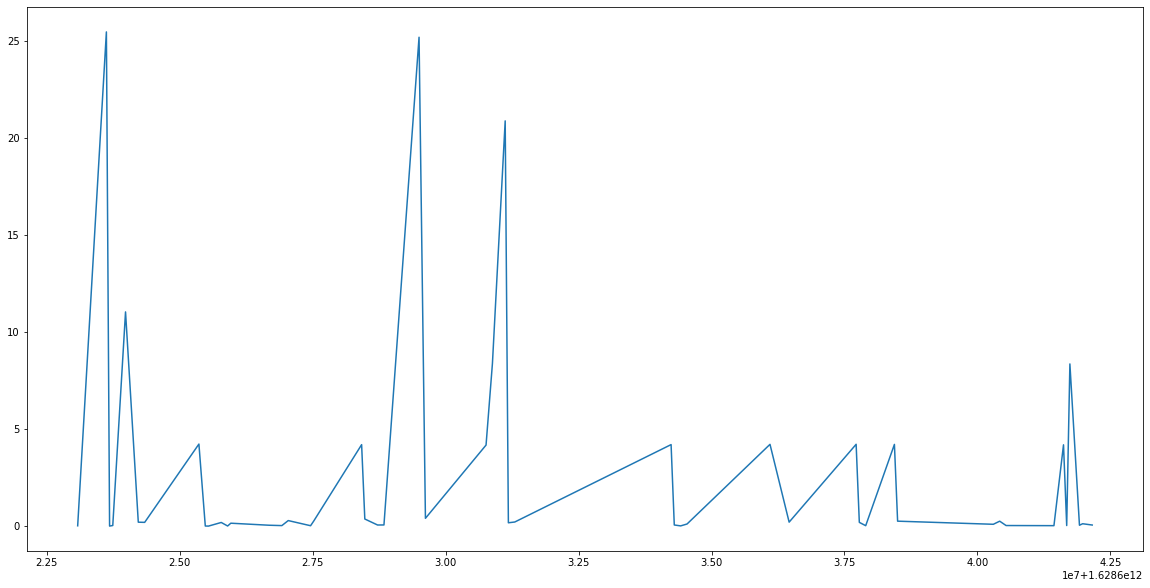

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df["time"][:50],df["volume"][:50])

In [14]:
df.tail()

,time,open,close,high,low,volume,Normal Time
6677,1630242360000,3.1817,3.1800,3.1817,3.1800,0.281695,2021-08-29 13:06:00
6678,1630242480000,3.1790,3.1790,3.1790,3.1790,0.021020,2021-08-29 13:08:00
6679,1630242720000,3.1732,3.1732,3.1732,3.1732,0.010555,2021-08-29 13:12:00
6680,1630242900000,3.1747,3.1747,3.1747,3.1747,0.091986,2021-08-29 13:15:00
6681,1630242960000,3.1786,3.1786,3.1786,3.1786,0.023297,2021-08-29 13:16:00


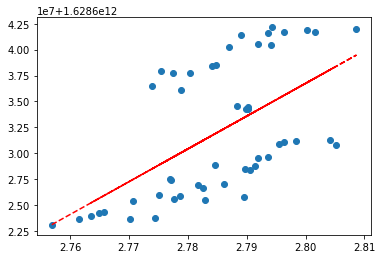

In [15]:
x = df['open'][:50]
y = df['time'][:50]
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

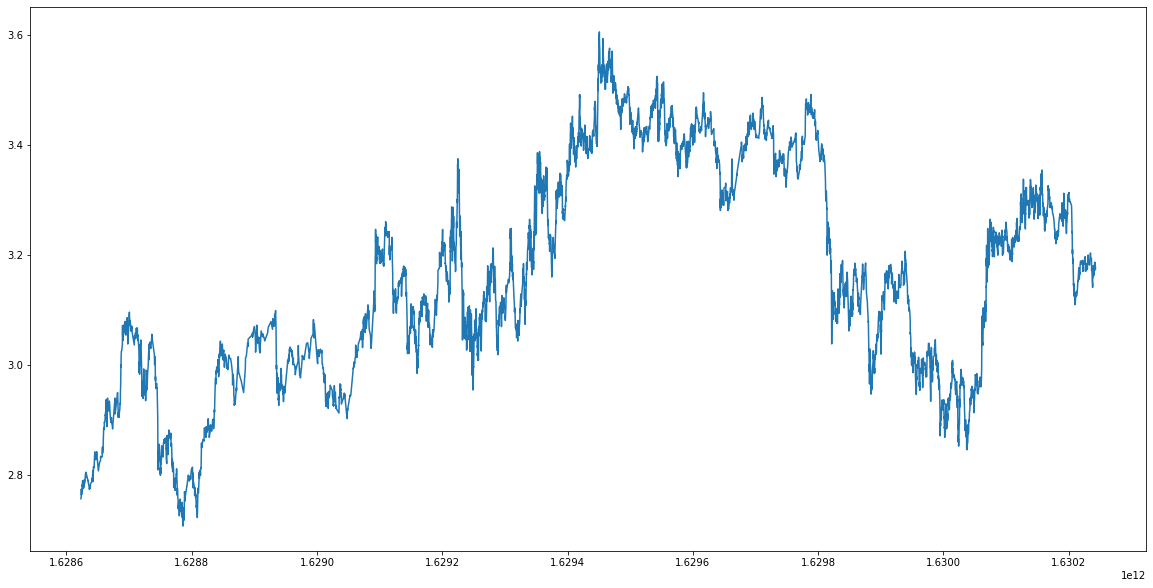

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df["time"],df["open"])

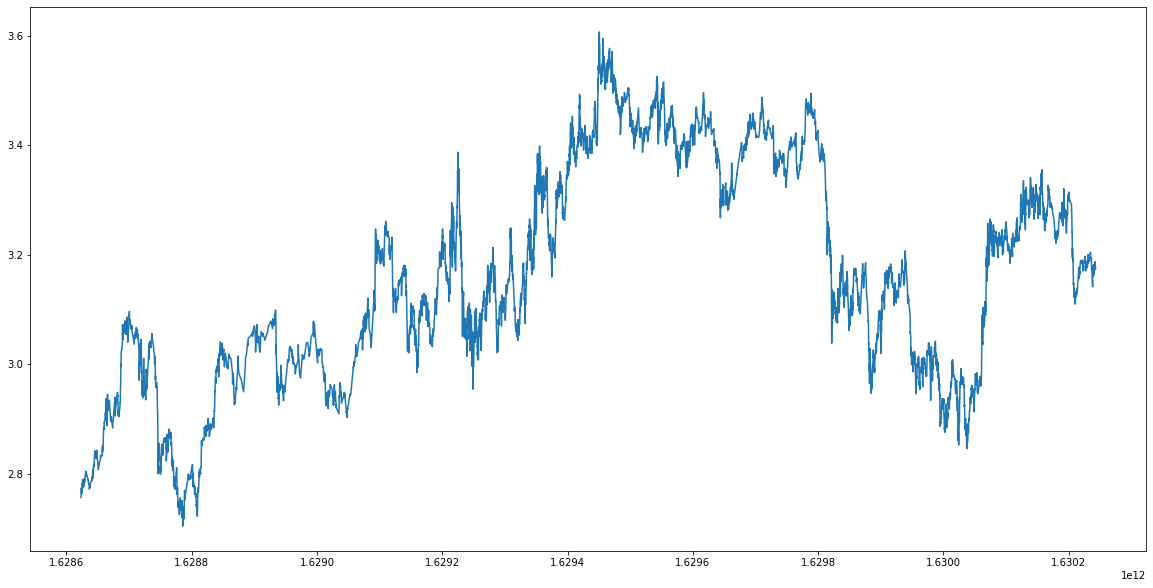

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df["time"],df["close"])

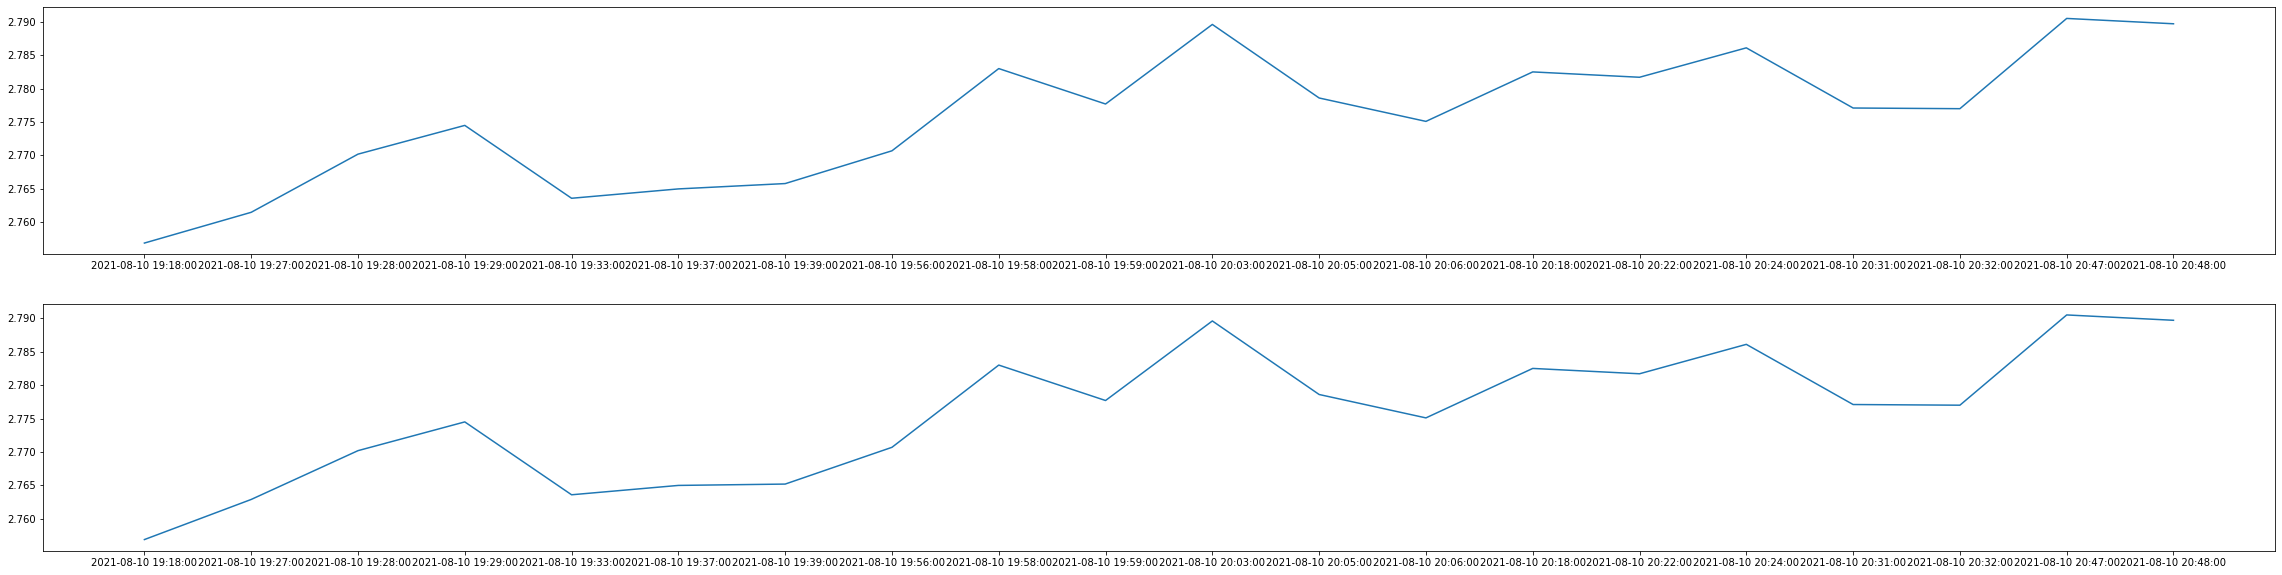

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(40, 10))

ax1.plot(df["Normal Time"][:20],df["open"][:20])
ax2.plot(df["Normal Time"][:20],df["close"][:20])

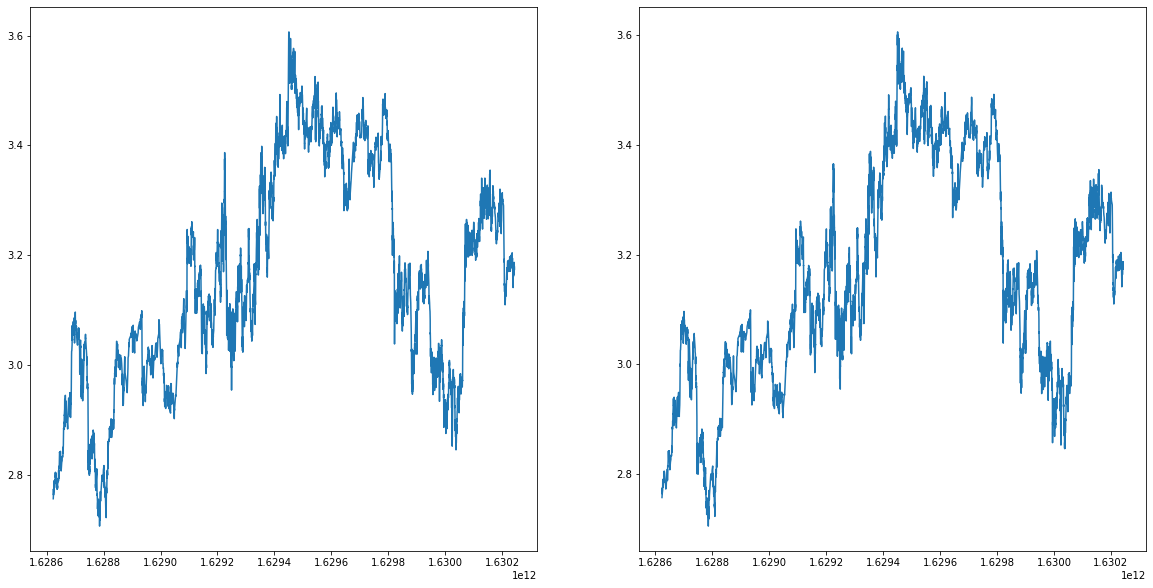

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))

ax1.plot(df["time"],df["high"])
ax2.plot(df["time"],df["low"])

In [20]:
X = df.drop(['open', 'close', 'Normal Time'],axis=1)
y = df[['open', 'close']]
X.head(), y.head()

(            time    high     low     volume
 0  1628623080000  2.7569  2.7569   0.018769
 1  1628623620000  2.7629  2.7615  25.443728
 2  1628623680000  2.7702  2.7702   0.004324
 3  1628623740000  2.7745  2.7745   0.034012
 4  1628623980000  2.7636  2.7636  11.030000,
      open   close
 0  2.7569  2.7569
 1  2.7615  2.7629
 2  2.7702  2.7702
 3  2.7745  2.7745
 4  2.7636  2.7636)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(5345, 4)

In [22]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [22]:
model.score(X_test, y_test)

0.9999361724344544

In [23]:
model.predict(X_test)

array([[3.35022 , 3.35021 ],
       [3.221119, 3.221119],
       [3.196249, 3.196052],
       ...,
       [2.836967, 2.838015],
       [3.005642, 3.005746],
       [3.349282, 3.349197]])

In [24]:
y_test

,open,close
4280,3.3502,3.3502
5975,3.2211,3.2211
1452,3.1973,3.1957
5926,3.2180,3.2180
6069,3.2440,3.2402
...,...,...
1756,3.1032,3.1032
807,2.9644,2.9644
462,2.8375,2.8375
879,3.0057,3.0057


In [25]:
def trainModel(df):
    X = df.drop(['open', 'close'],axis=1)
    y = df[['open', 'close']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score



In [1]:
scores = []

for filenames in csvFileNames[:3]:
    file = pd.read_csv(filenames)
    try:
        file = file.drop('Unnamed: 0', axis=1)
    except:
        pass
    scores.append(trainModel(file))

min(scores)

NameError: name 'csvFileNames' is not defined

In [ ]:
dict = {
    "coin" : [fname for fname in os.listdir("Dataset/")],
    "score" : scores
}

scoresDF = pd.DataFrame(data = dict)
scoresDF

In [ ]:
scoresDF.to_csv("randomForestScores.csv")